In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henrique\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def palavra_separadas(dados, len_palavras = 2):
  '''
  ******************************************************************************
  palvavra_separadas: Separa as palavras com mais de
  len_palavras caracteres, retirando pontuacoes.
  ------------------------------------------------------------------------------
  Input:
  ------------------------------------------------------------------------------
  dados: Datafame
  len_palavras : tamanho minimo das palavras que seram considerado (>2)
  ------------------------------------------------------------------------------
  Outout:
  ------------------------------------------------------------------------------
  tokens: listas com as palavras separadas
  ------------------------------------------------------------------------------
  ******************************************************************************
  '''
  tokens = []
  for frase in dados["tratados"]:
    for token in nltk.tokenize.word_tokenize(frase):
      if token.isalpha() and len(token) > len_palavras:
        tokens.append(token.lower())

  return tokens

def gera_palavras_unicas(palavras):
  '''
  ******************************************************************************
  gera_palavras_unicas: Gera conjunto com palavras unicas.
  ------------------------------------------------------------------------------
  Input:
  ------------------------------------------------------------------------------
  palavra: lista com as palavras  
  ------------------------------------------------------------------------------
  Outout:
  ------------------------------------------------------------------------------
  tokens: listas com as palavras separadas
  ------------------------------------------------------------------------------
  ******************************************************************************
  '''
  unicas = set()

  for palavra in palavras:
    unicas.add(palavra)

  return unicas

def diff(lista):
  '''
  ******************************************************************************
  Calcula a diferenca entre dois termo adjacentes de um lista.
  ------------------------------------------------------------------------------
  Input:
  ------------------------------------------------------------------------------
  lista: lista com valores interios  
  ------------------------------------------------------------------------------
  Outout:
  ------------------------------------------------------------------------------
  return: lista_diff
  ------------------------------------------------------------------------------
  ******************************************************************************
  '''
  lista_diff = [0.0]
  for i in range(1, len(lista)):
    lista_diff.append(lista[i] - lista[i-1])
    
  return lista_diff

In [13]:
def substituir(dados):
  '''
  ******************************************************************************
  Tratando a base de dados.
  ------------------------------------------------------------------------------
  Input:
  ------------------------------------------------------------------------------
  dados: Datafame original
  ------------------------------------------------------------------------------
  Outout:
  ------------------------------------------------------------------------------
  dados: Datafame com coluna tratado
  ------------------------------------------------------------------------------
  ******************************************************************************
  '''
  dados["tratados"] = dados["front"]

  retirar = re.compile("\[anki:play:q:0\]")
  linhas = []
  for linha in dados["tratados"]:    
    linhas.append(re.sub(retirar, '', linha))
  dados["tratados"] = linhas

  retirar = re.compile("\[Grammar\]")
  linhas = []
  for linha in dados["tratados"]:    
    linhas.append(re.sub(retirar, '', linha))
  dados["tratados"] = linhas

  retirar = re.compile("\[Inglês Britânico\]")
  linhas = []
  for linha in dados["tratados"]:    
    linhas.append(re.sub(retirar, '', linha))
  dados["tratados"] = linhas

In [14]:
def make_date(file_name):
  '''
  ******************************************************************************
  make_date: Le o nome do arquivo e retorna a data.
  ------------------------------------------------------------------------------
  Input:
  ------------------------------------------------------------------------------
  file_name: nome do arquivo
  ------------------------------------------------------------------------------
  Outout:
  ------------------------------------------------------------------------------
  Data no formato 00/00/0000
  ------------------------------------------------------------------------------
  ******************************************************************************
  '''
  return file_name[file_name.index("anki")+5:file_name.index(".")].replace("_","/")

In [15]:
files = ("dados/anki_11_02_2021.txt", 
         "dados/anki_08_03_2021.txt", 
         "dados/anki_02_04_2021.txt",
         "dados/anki_01_05_2021.txt",
         "dados/anki_01_06_2021.txt",
         "dados/anki_02_07_2021.txt",
         "dados/anki_04_08_2021.txt",
         "dados/anki_01_09_2021.txt")

In [16]:
dias = []
total_palavras = []
total_de_palavras_unicas = []
for file_name in files:
  
    dados = pd.read_csv(file_name, sep="\t", header=None, names = ["front", "back"])
    substituir(dados)
  
    lista_palavras = palavra_separadas(dados, len_palavras = 2)
    total_palavras.append(len(lista_palavras))
    
    lista_palavras_unicas = gera_palavras_unicas(lista_palavras)
    total_de_palavras_unicas.append(len(lista_palavras_unicas))
    
    dia = make_date(file_name)   
    dias.append(dia)  

In [17]:
f = open("total_palavras.csv","w")
f.write(f"dia,total_de_palavras,total_de_palavras_unicas\n")
for dia, palavras, palavras_unicas in zip(dias, total_palavras, total_de_palavras_unicas):
    
    print(f"data                     : {dia}")
    print(f"Total de palavras        : {palavras}")
    print(f"Total de palavras unicas : {palavras_unicas}")
    print()
    
    f.write(f"{dia},{palavras},{palavras_unicas}\n")

f.close() 

data                     : 11/02/2021
Total de palavras        : 22722
Total de palavras unicas : 4862

data                     : 08/03/2021
Total de palavras        : 27007
Total de palavras unicas : 5396

data                     : 02/04/2021
Total de palavras        : 32503
Total de palavras unicas : 6084

data                     : 01/05/2021
Total de palavras        : 40529
Total de palavras unicas : 6956

data                     : 01/06/2021
Total de palavras        : 45039
Total de palavras unicas : 7385

data                     : 02/07/2021
Total de palavras        : 45881
Total de palavras unicas : 7487

data                     : 04/08/2021
Total de palavras        : 46609
Total de palavras unicas : 7559

data                     : 01/09/2021
Total de palavras        : 47745
Total de palavras unicas : 7675



In [18]:
with open('palavras.csv', 'w') as f:
    for palavra in lista_palavras_unicas:
        f.write(palavra+'\n')

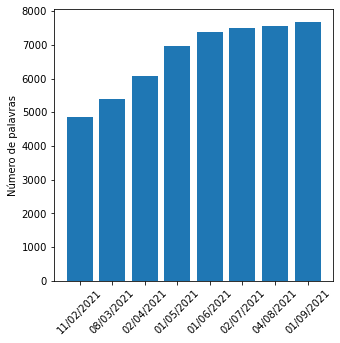

In [19]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylabel("Número de palavras")
plt.xticks(rotation=45)
ax.bar(dias,total_de_palavras_unicas)  
#plt.show()
plt.savefig('fig/grafico.png', bbox_inches='tight', dpi=200)

In [22]:
total_de_palavras_unicas_diff = diff(total_de_palavras_unicas)

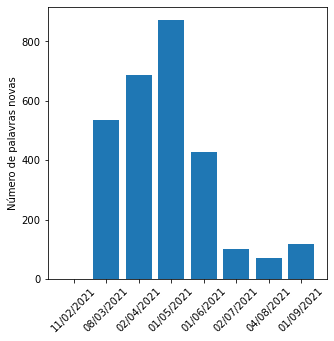

In [27]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylabel("Número de palavras novas")
plt.xticks(rotation=45)
ax.bar(dias,total_de_palavras_unicas_diff)  
#plt.show()
plt.savefig('fig/numero_de_palavras_novas.png', bbox_inches='tight', dpi=200)